In [1]:
# Biopython의 Phylo 모듈을 import 합니다.
from Bio import Phylo

# 'simple.dnd' 파일에서 Newick 형식의 계통수를 읽어 tree 변수에 저장합니다.
tree = Phylo.read("simple.dnd", "newick")

# 읽어온 계통수 객체의 기본 정보를 출력
print(tree) 

Tree(rooted=False, weight=1.0)
    Clade()
        Clade()
            Clade()
                Clade(name='A')
                Clade(name='B')
            Clade()
                Clade(name='C')
                Clade(name='D')
        Clade()
            Clade(name='E')
            Clade(name='F')
            Clade(name='G')


In [2]:
# 계통수를 ASCII 문자 형태로 시각화하여 출력
Phylo.draw_ascii(tree)

                                                    ________________________ A
                           ________________________|
                          |                        |________________________ B
  ________________________|
 |                        |                         ________________________ C
 |                        |________________________|
_|                                                 |________________________ D
 |
 |                         ________________________ E
 |                        |
 |________________________|________________________ F
                          |
                          |________________________ G



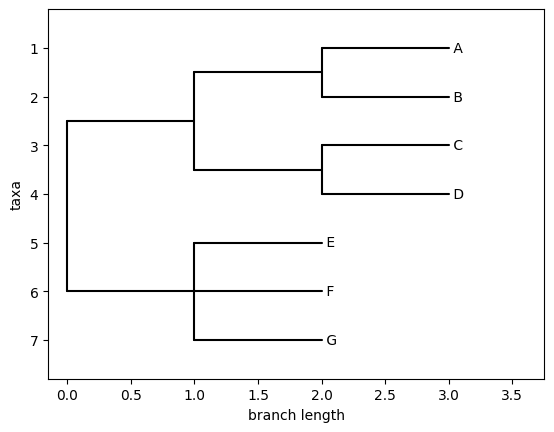

In [ ]:
Phylo.draw(tree) #더 이쁘게 나옴

In [ ]:
from Bio import AlignIO, Phylo
from Bio.Phylo.TreeConstruction import (
    DistanceCalculator, DistanceTreeConstructor,
    ParsimonyScorer, NNITreeSearcher, ParsimonyTreeConstructor
)
import matplotlib.pyplot as plt

# STEP 1: 정렬된 FASTA 파일 읽기
alignment = AlignIO.read("example_aligned.fasta", "fasta") #데이터는 4개의 ABCD 정렬된 서열 
print("Loaded alignment length:", alignment.get_alignment_length())

#길이가 총 12개임을 확인함.

Loaded alignment length: 12


In [ ]:

# STEP 2: 거리 행렬 계산
calculator = DistanceCalculator("identity") #같고 다른지만 고려한다는 옵션 = identity 를 사용해서 거리 행렬 계산. 
dm = calculator.get_distance(alignment)
print("\nPairwise distance matrix:\n", dm)

# 각 pair 마다 같은지 다른지를 통해 거리 확인 
# 같고 다른거의 비율로 계산이 됨. 1보다 작은 값으로 프린트 됨


Pairwise distance matrix:
 A   0.000000
B   0.083333    0.000000
C   0.083333    0.166667    0.000000
D   0.166667    0.083333    0.083333    0.000000
    A   B   C   D


In [ ]:

# STEP 3-1: Neighbor-Joining (NJ) 계통수 생성
constructor = DistanceTreeConstructor() # 생성자 생성
nj_tree = constructor.nj(dm) #constructor.nj가 네이버 조이닝 구하는 함수. 여기에 거리 행렬 넣으면 됨 
print("\nNeighbor-Joining Tree:")
Phylo.draw_ascii(nj_tree)
# 당연히 루트에서 터미널 노드까지 거리는 다를 수 있다.


Neighbor-Joining Tree:
                                       ______________________________________ A
  ____________________________________|
 |                                    |______________________________________ B
_|
 |_____________________________________ C
 |
 |_____________________________________ D



In [ ]:

# STEP 3-2: UPGMA 계통수 생성
upgma_tree = constructor.upgma(dm) #upgma 함수에 또 거리행렬 넣으면 구할 수 있음 
print("\nUPGMA Tree:")
Phylo.draw_ascii(upgma_tree)

# UPGMA와 네이버 조이닝 은 branch length는 다르지만 tree topology는 같다!!!!



UPGMA Tree:
                           __________________________________________________ D
  ________________________|
 |                        |__________________________________________________ C
_|
 |                         __________________________________________________ B
 |________________________|
                          |__________________________________________________ A



In [8]:


# STEP 3-3: Maximum Parsimony (MP) 계통수 생성
scorer = ParsimonyScorer()
searcher = NNITreeSearcher(scorer) #휴리스틱 중 NNI 사용할거임. 

In [10]:

# NJ 트리를 초기 트리로 사용하여 MP 방법으로 최적 트리 추정
constructor_mp = ParsimonyTreeConstructor(searcher, nj_tree) 
#휴리스틱 방법으로 찾는거기에 initial tree가 뭔지에 따라 결과값이 달라질 수 있음
#계산이 빠른 네이버 조이닝 트리 또는 UPGMA를 initial tree로 하면 좋다. 랜덤 트리보다.
mp_tree = constructor_mp.build_tree(alignment)
print("\nMaximum Parsimony Tree:")
Phylo.draw_ascii(mp_tree)



Maximum Parsimony Tree:
                           __________________________________________________ A
  ________________________|
 |                        |__________________________________________________ B
_|
 |                         __________________________________________________ D
 |________________________|
                          |__________________________________________________ C



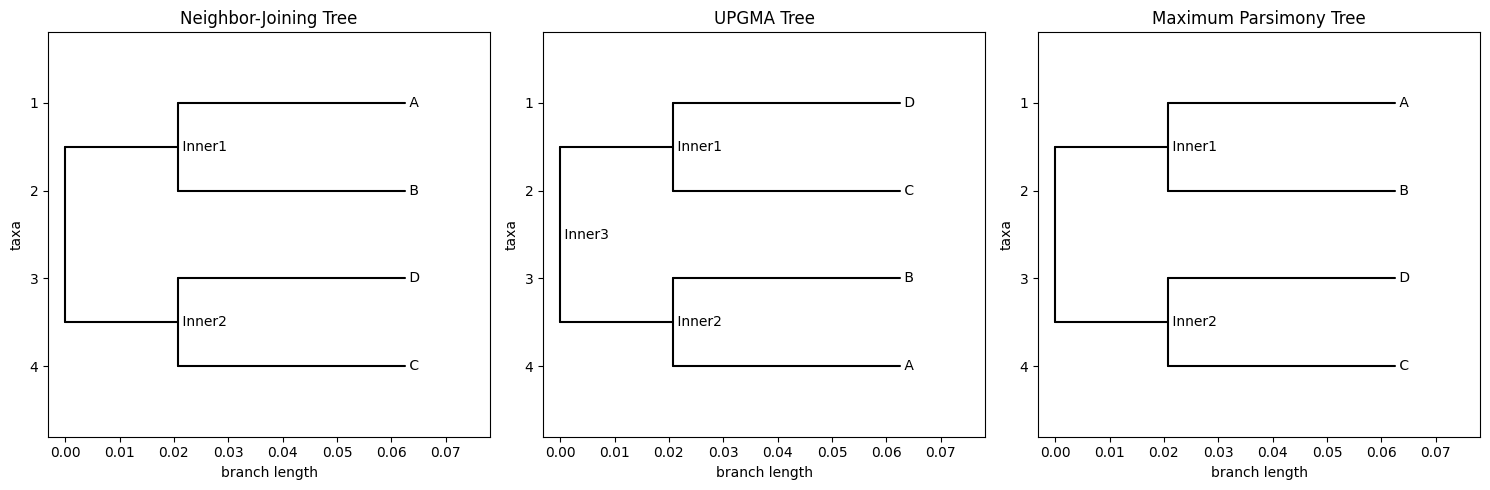

In [ ]:

# STEP 4: 계통수 시각화 (Phylo.draw함수 사용해서 이쁘게)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

Phylo.draw(nj_tree, axes=axes[0], do_show=False)
axes[0].set_title("Neighbor-Joining Tree")

Phylo.draw(upgma_tree, axes=axes[1], do_show=False)
axes[1].set_title("UPGMA Tree")

Phylo.draw(mp_tree, axes=axes[2], do_show=False)
axes[2].set_title("Maximum Parsimony Tree")

plt.tight_layout()
plt.show()

# branch length가 나올 수 있는데 안나왔네..
# 일단 토폴로지만 비교. 똑같이 나온다! 간단한 예제라서.
